In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math as m

In [8]:
#baseline data, for general shape
heights = [0,0,-1,-1,-1,1,1,1,2,2,1,1,1,-1,-1,-1,0,0]
heights_2 = [0,0,-1,-1,-1,1,1,1,1,1,1,1,1,-1,-1,-1,0,0]
pos = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
heights_p = []
heights_p2 = []
pos_p = []
#increasing data density
for i in range(len(heights)):
    heights_p.append(heights[i])
    heights_p.append(heights[i])
    heights_p2.append(heights_2[i])
    heights_p2.append(heights_2[i])
    pos_p.append(pos[i])
    pos_p.append(pos[i]+1/2)
#adding data to DF object and scaling appropriately
df1 = pd.DataFrame({'heights':heights_p,'heights2':heights_p2,'position':pos_p})
df1['position']=df1['position']*(0.2/17)
df1['heights']=df1['heights']*(0.75/2)
df1['heights2']=df1['heights2']*(0.75/2)

Text(0.5, 1.0, 'Sample Profile, 0.75in. Tuner w/o Hole')

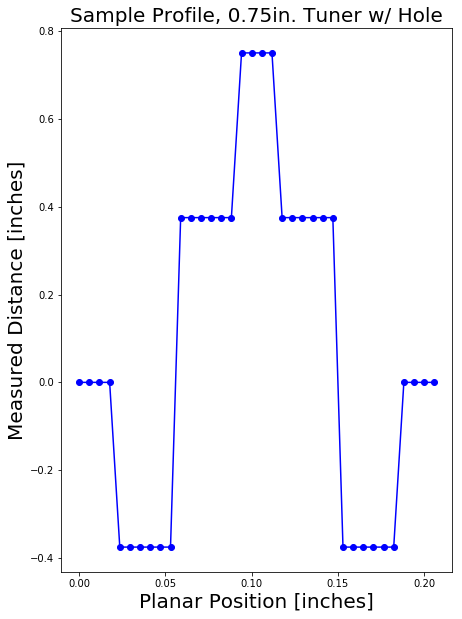

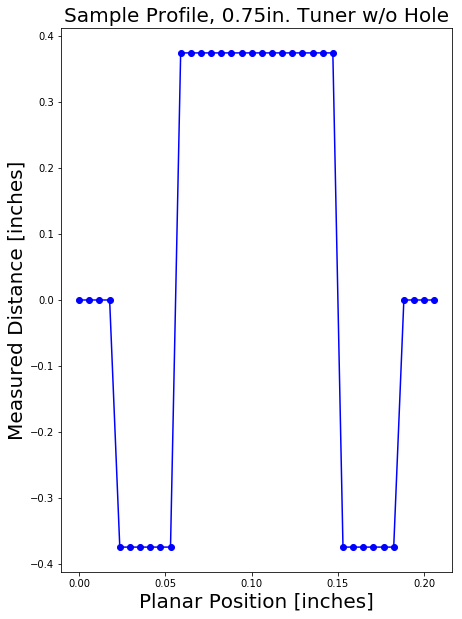

In [17]:
fig1 = plt.figure(figsize=(7,10))
plt.plot(df1['position'],df1['heights'],'bo',linestyle = '-')
plt.xlabel('Planar Position [inches]',fontsize=20)
plt.ylabel('Measured Distance [inches]',fontsize=20)
plt.title('Sample Profile, 0.75in. Tuner w/ Hole',fontsize=20)

fig2 = plt.figure(figsize=(7,10))
plt.plot(df1['position'],df1['heights2'],'bo',linestyle = '-')
plt.xlabel('Planar Position [inches]',fontsize=20)
plt.ylabel('Measured Distance [inches]',fontsize=20)
plt.title('Sample Profile, 0.75in. Tuner w/o Hole',fontsize=20)

In [18]:
#Calculating the resolution uncertainty
#Sensor Resolution
res_sens = 50e-6 #meters
#convert to inches
res_sens *= 39.37008
#find resolution uncertainty using standard estimate method
res_u = res_sens/m.sqrt(3)
#update all measurement distances with normal distribution to simulate sensor noise
norm_err_pos1 = []
norm_err_pos2 = []
for i in range(len(df1['heights'])):
    norm_err_pos1.append(np.random.normal(loc=df1['heights'][i],scale=res_u))
    norm_err_pos2.append(np.random.normal(loc=df1['heights2'][i],scale=res_u))
df2 = pd.DataFrame({'heights':norm_err_pos1,'heights2':norm_err_pos2,'position':df1['position']})

Text(0.5, 1.0, 'Sample Profile, 0.75in. Tuner w/o Hole')

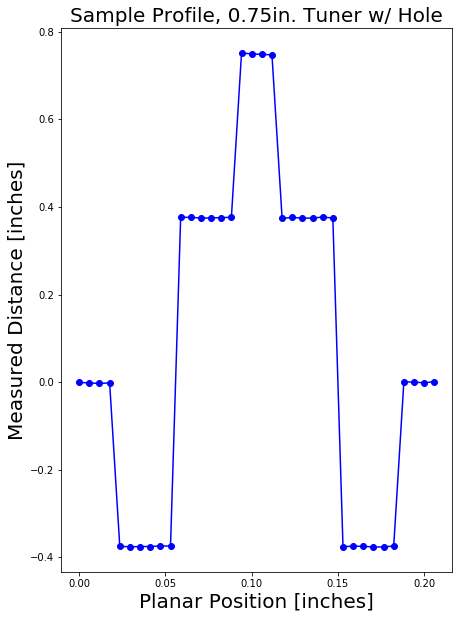

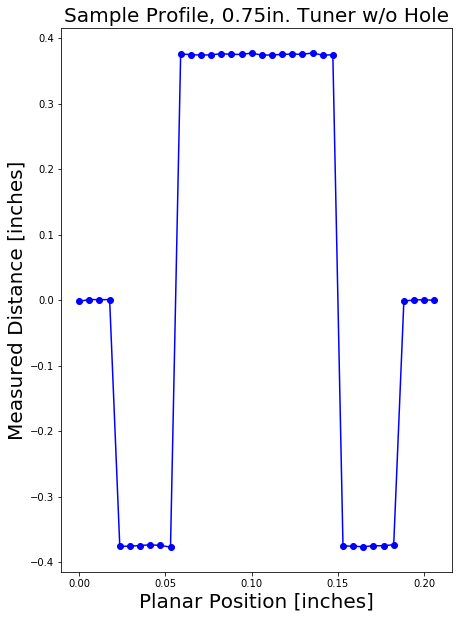

In [19]:
#Plotting the profiles with simulated noise
fig1n = plt.figure(figsize=(7,10))
plt.plot(df2['position'],df2['heights'],'bo',linestyle = '-')
plt.xlabel('Planar Position [inches]',fontsize=20)
plt.ylabel('Measured Distance [inches]',fontsize=20)
plt.title('Sample Profile, 0.75in. Tuner w/ Hole',fontsize=20)

fig2n = plt.figure(figsize=(7,10))
plt.plot(df2['position'],df2['heights2'],'bo',linestyle = '-')
plt.xlabel('Planar Position [inches]',fontsize=20)
plt.ylabel('Measured Distance [inches]',fontsize=20)
plt.title('Sample Profile, 0.75in. Tuner w/o Hole',fontsize=20)


In [ ]:
def hole_check(pos,h,board): #determines whether the tuner profile has a hole in it
    #check if the maximum distance exceeds the maximum possible value for the longest tuner
    #if max(h) - board(pos) > length of longest tuner:
        #return True
    #else if (check for discontinuity condition, this will depend on the resolution of the data):
        #return true
    #else:
        #return false